## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
from scipy.stats import ttest_ind
from scipy.stats import stats
warnings.filterwarnings('ignore')

## Loading the dataset

In [48]:
#Loading the dataset
conn = sqlite3.connect('inventory.db')

#Fetching the dataset
df = pd.read_sql_query('select * from vendor_sales_summary', conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,Volume,Total_Purchased_Quantity,Total_Purchased_Dollars,Total_SalesDollars,Total_SalesQuantity,Total_SalesPrice,Total_ExciseTax,Freight_Cost,Gross_Profit,Profit_Margin,Stock_Turnover,Sales_To_Purchase_Ratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,5101919.51,142049.0,672819.31,260999.20,68601.68,1290667.91,0.252977,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,4819073.49,160247.0,561512.37,294438.66,144929.24,1015032.27,0.210628,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,4538120.60,187140.0,461140.15,343854.07,123780.22,1119816.92,0.246758,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,4475972.88,200412.0,420050.01,368242.80,257032.07,1214774.94,0.271399,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,4223107.62,135838.0,545778.28,249587.83,257032.07,1199901.61,0.284128,0.983556,1.396897


## Exploratory Data Analysis

* Phase 1: Variable Selection: We began by inspecting the database schema to identify and select the key variables relevant to this analysis.

* Phase 2: Distribution Analysis: This notebook focuses on the exploratory data analysis (EDA) of the consolidated dataset. We will examine the distribution of each feature to  identify patterns, detect outliers, and validate data quality before further modeling.

In [3]:
#Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.000000,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.000000,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,0.360000,6.840000,10.455000,19.482500,5.681810e+03
Actual_Price,10692.0,35.643671,148.246016,0.490000,10.990000,15.990000,28.990000,7.499990e+03
Total_Purchased_Quantity,10692.0,3140.886831,11095.086769,1.000000,36.000000,262.000000,1975.750000,3.376600e+05
Total_Purchased_Dollars,10692.0,30106.693372,123067.799627,0.710000,453.457500,3655.465000,20738.245000,3.811252e+06
Total_SalesDollars,10514.0,42954.173834,168977.755843,1.980000,809.820000,5599.700000,29524.250000,5.101920e+06
Total_SalesQuantity,10514.0,3129.583317,11037.801407,1.000000,36.000000,280.000000,1985.000000,3.349390e+05
Total_SalesPrice,10514.0,19111.958773,45264.605387,0.990000,334.890000,3020.085000,16442.477500,6.728193e+05
Total_ExciseTax,10514.0,1804.263569,11065.659557,0.060000,5.382500,50.425000,436.730000,3.682428e+05


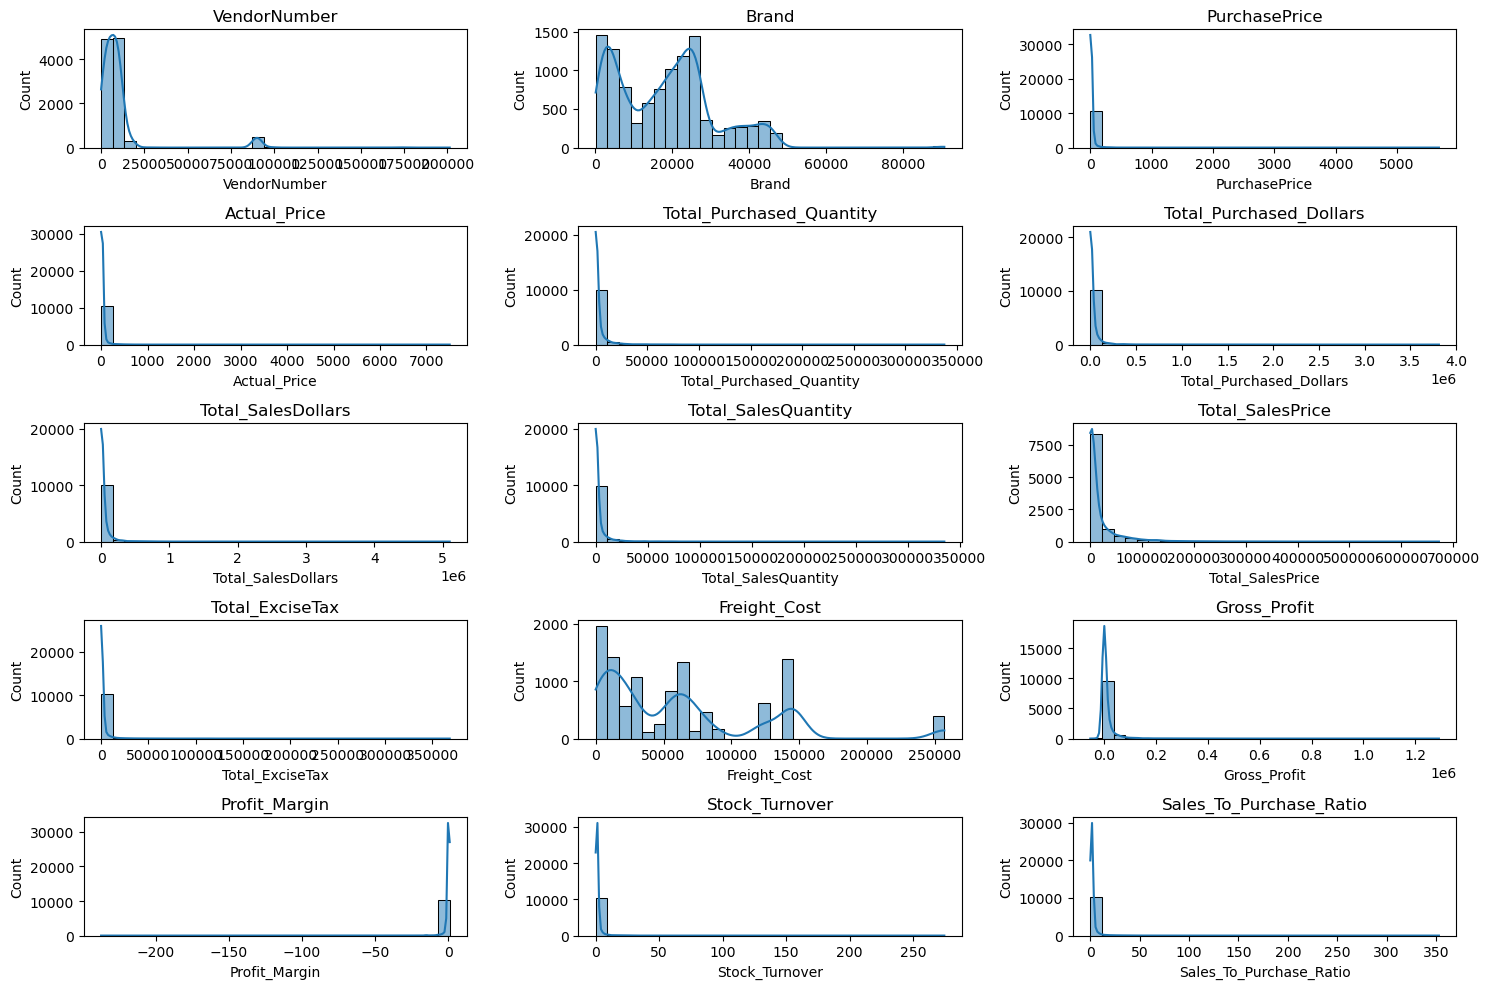

In [4]:
# Selects columns from the DataFrame 'df' that contain numerical data and stores their names in a list.
numerical_cols = df.select_dtypes(include=np.number).columns

# Creates a figure (the overall window for all the plots) with a size of 15x10 inches.
plt.figure(figsize=(15, 10))

# Loops through each numerical column name in the 'numerical_cols' list.
for i, col in enumerate(numerical_cols):
    
    # Creates a 4x4 grid of subplots and selects the next available position (i+1) for the current plot.
    plt.subplot(5, 3, i+1)
    
    # Draws a histogram using the seaborn library for the data in the current column.
    # 'kde=True' adds a smooth curve, and 'bins=30' creates 30 bars.
    sns.histplot(df[col], kde=True, bins=30)
    
    # Sets the title of the current subplot to the name of the column.
    plt.title(col)

# Automatically adjusts the spacing between subplots to prevent labels from overlapping.
plt.tight_layout()

# Displays the final figure with all the generated plots.
plt.show()

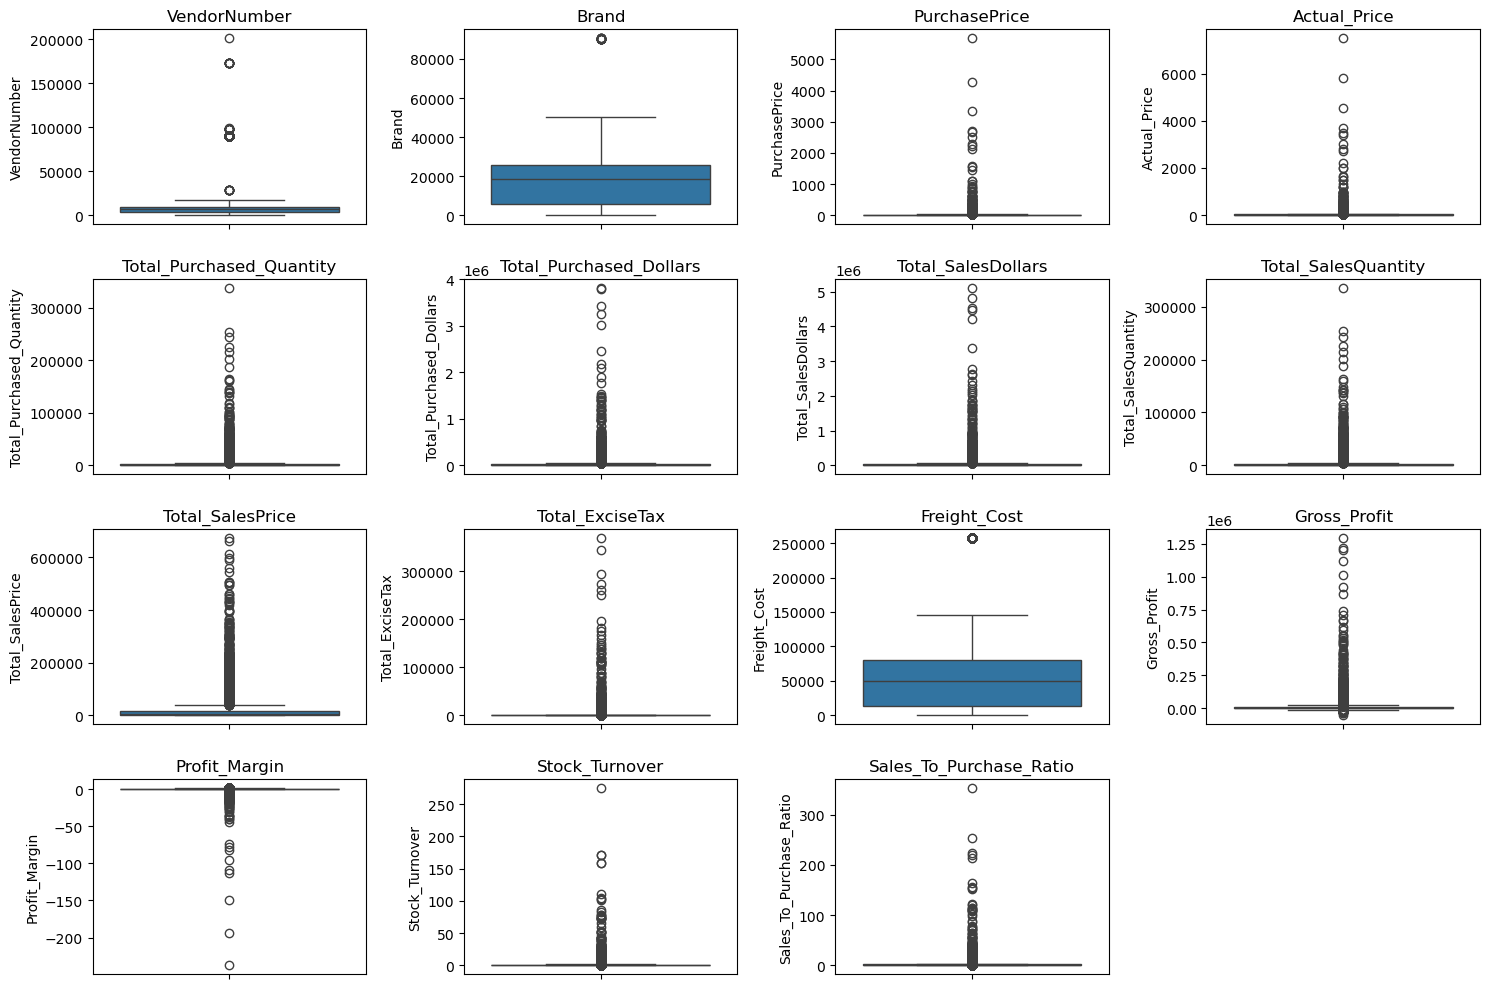

In [5]:
# Selects columns from the DataFrame 'df' that contain numerical data and stores their names in a list.
numerical_cols = df.select_dtypes(include=np.number).columns

# Creates a figure (the overall window for all the plots) with a size of 15x10 inches.
plt.figure(figsize=(15, 10))

# Loops through each numerical column name in the 'numerical_cols' list.
for i, col in enumerate(numerical_cols):
    
    # Creates a 4x4 grid of subplots and selects the next available position (i+1) for the current plot.
    plt.subplot(4, 4, i+1)
    
    # Draws a histogram using the seaborn library for the data in the current column.
    # 'kde=True' adds a smooth curve, and 'bins=30' creates 30 bars.
    sns.boxplot(y = df[col])
    
    # Sets the title of the current subplot to the name of the column.
    plt.title(col)

# Automatically adjusts the spacing between subplots to prevent labels from overlapping.
plt.tight_layout()

# Displays the final figure with all the generated plots.
plt.show()

In [6]:
df = pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
WHERE Gross_Profit > 0
AND Profit_Margin > 0
AND Total_SalesQuantity > 0""", conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,Volume,Total_Purchased_Quantity,Total_Purchased_Dollars,Total_SalesDollars,Total_SalesQuantity,Total_SalesPrice,Total_ExciseTax,Freight_Cost,Gross_Profit,Profit_Margin,Stock_Turnover,Sales_To_Purchase_Ratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,5101919.51,142049.0,672819.31,260999.20,68601.68,1290667.91,0.252977,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,4819073.49,160247.0,561512.37,294438.66,144929.24,1015032.27,0.210628,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,4538120.60,187140.0,461140.15,343854.07,123780.22,1119816.92,0.246758,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,4475972.88,200412.0,420050.01,368242.80,257032.07,1214774.94,0.271399,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,4223107.62,135838.0,545778.28,249587.83,257032.07,1199901.61,0.284128,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,15.95,5.0,10.96,0.55,27100.41,13.31,0.834483,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,65.66,134.0,1.47,7.04,50293.62,63.32,0.964362,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,1.98,2.0,0.99,0.10,14069.87,0.50,0.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,143.28,72.0,77.61,15.12,257032.07,141.81,0.989740,72.000000,97.469388


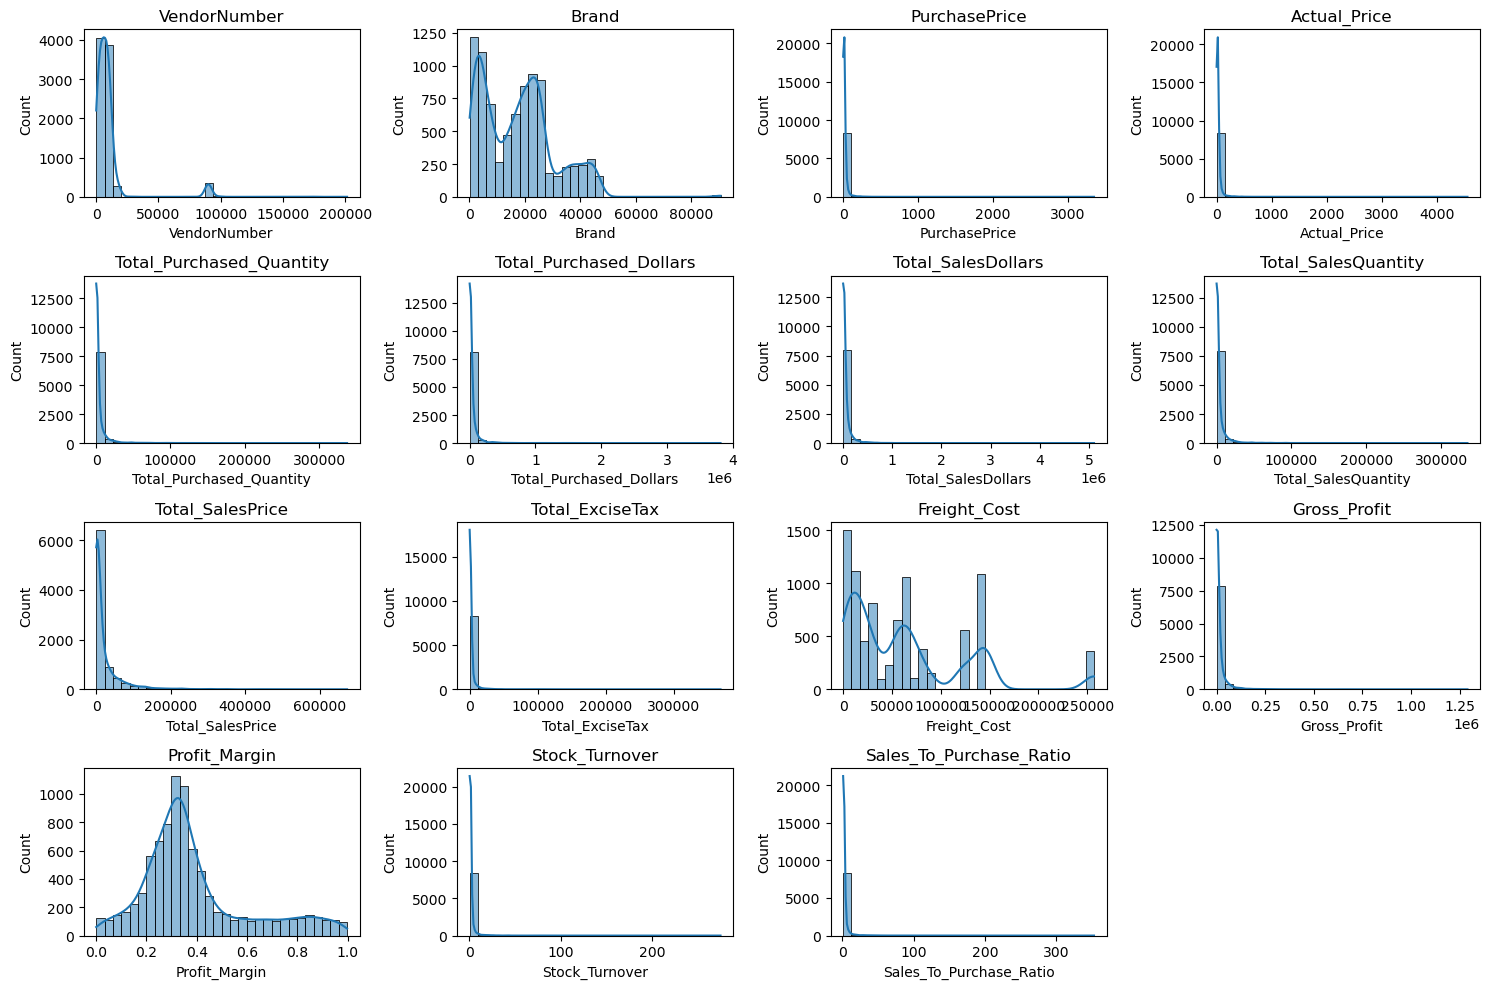

In [7]:
# Selects columns from the DataFrame 'df' that contain numerical data and stores their names in a list.
numerical_cols = df.select_dtypes(include=np.number).columns

# Creates a figure (the overall window for all the plots) with a size of 15x10 inches.
plt.figure(figsize=(15, 10))

# Loops through each numerical column name in the 'numerical_cols' list.
for i, col in enumerate(numerical_cols):
    
    # Creates a 4x4 grid of subplots and selects the next available position (i+1) for the current plot.
    plt.subplot(4, 4, i+1)
    
    # Draws a histogram using the seaborn library for the data in the current column.
    # 'kde=True' adds a smooth curve, and 'bins=30' creates 30 bars.
    sns.histplot(df[col], kde=True, bins=30)
    
    # Sets the title of the current subplot to the name of the column.
    plt.title(col)

# Automatically adjusts the spacing between subplots to prevent labels from overlapping.
plt.tight_layout()

# Displays the final figure with all the generated plots.
plt.show()

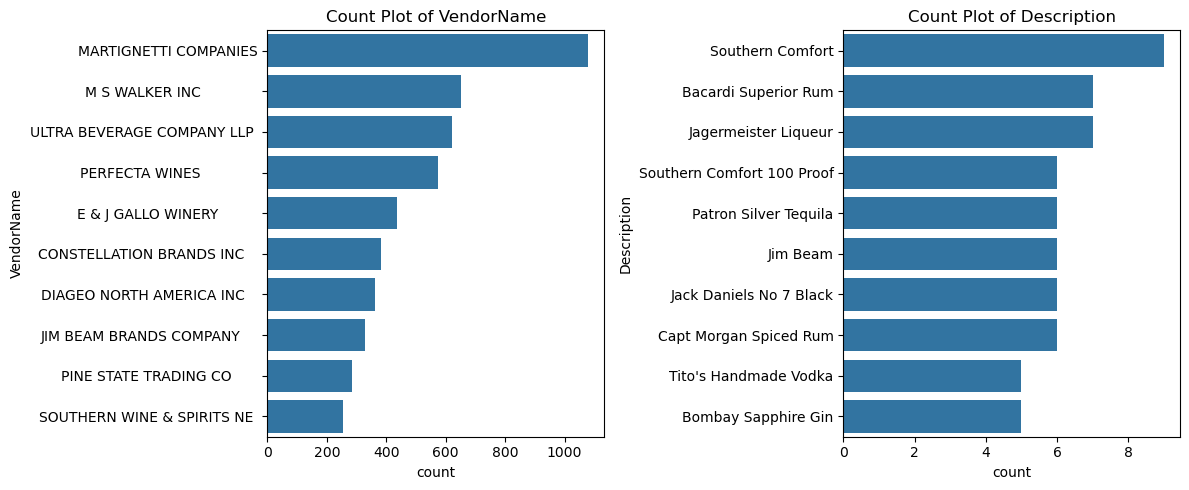

In [8]:
categorical_cols = ['VendorName', 'Description']

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot( y = df[col], order=df[col].value_counts().index[:10])
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()

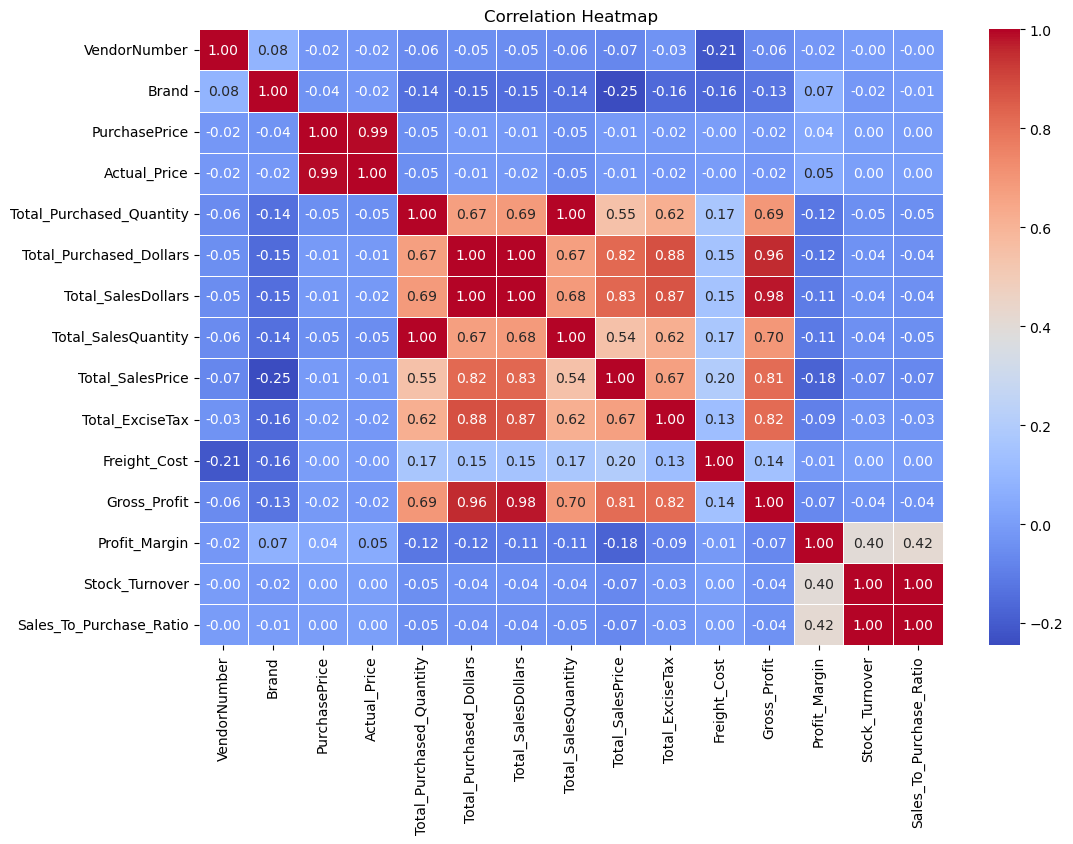

In [9]:
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot = True, fmt='.2f', cmap='coolwarm', linewidth = 0.5)
plt.title('Correlation Heatmap')
plt.show()

### Correlation Analysis

## Data Analysis


### Identify Brands needs Promotional or Pricing Adjustments which exhibits lower sales performance but higher profit margins

In [10]:
brand_performance = df.groupby('Description').agg({
    'Total_SalesDollars':'sum',
    'Profit_Margin':'mean'}).reset_index()
brand_performance

,Description,Total_SalesDollars,Profit_Margin
0,(RI) 1,21519.09,0.180607
1,.nparalleled Svgn Blanc,1094.63,0.299782
2,10 Span Cab Svgn CC,2703.89,0.209376
3,10 Span Chard CC,3325.56,0.278064
4,10 Span Pnt Gris Monterey Cy,2082.22,0.322262
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,0.295257
7703,Zuccardi Q Malbec,1639.18,0.239815
7704,Zum Rsl,10857.34,0.326750
7705,Zwack Liqueur,227.88,0.166535


In [11]:
low_sales_threshold = brand_performance['Total_SalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['Profit_Margin'].quantile(0.85)

In [12]:
low_sales_threshold

560.299

In [13]:
high_margin_threshold

0.6497017552750112

In [14]:
target_brands = brand_performance[
    (brand_performance["Total_SalesDollars"] <= low_sales_threshold) &
    (brand_performance["Profit_Margin"] >= high_margin_threshold)
]
print("Brand with lower Sales but Higher Profit Margin:")
display(target_brands.sort_values('Total_SalesDollars'))

Brand with lower Sales but Higher Profit Margin:


,Description,Total_SalesDollars,Profit_Margin
6199,Santa Rita Organic Svgn Bl,9.99,0.664665
2369,Debauchery Pnt Nr,11.58,0.659758
2070,Concannon Glen Ellen Wh Zin,15.95,0.834483
2188,Crown Royal Apple,27.86,0.898062
6237,Sauza Sprklg Wild Berry Marg,27.96,0.821531
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,0.767473
2271,Dad's Hat Rye Whiskey,538.89,0.818516
57,A Bichot Clos Marechaudes,539.94,0.677409
6245,Sbragia Home Ranch Merlot,549.75,0.664447


In [15]:
brand_performance = brand_performance[brand_performance['Total_SalesDollars']<10000] #For making scatterplot clear by taking it upto 1000 values

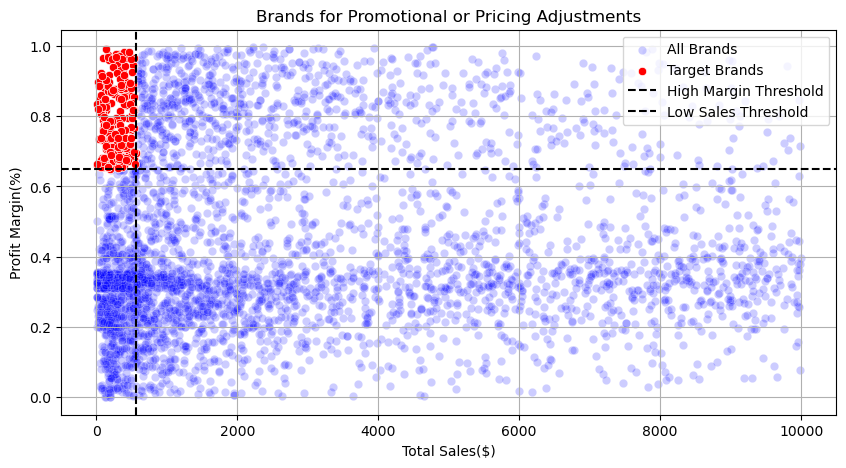

In [16]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=brand_performance, x='Total_SalesDollars', y='Profit_Margin', color='blue', label='All Brands', alpha = 0.2)
sns.scatterplot(data=target_brands, x='Total_SalesDollars', y='Profit_Margin', color='red', label='Target Brands')

plt.axhline(high_margin_threshold, linestyle='--', color='black', label='High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle='--', color='black', label='Low Sales Threshold')

plt.xlabel("Total Sales($)")
plt.ylabel('Profit Margin(%)')
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

#### Which vendors and brands demonstate the highest Sales Performance 

In [17]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)    

In [18]:
#Top Vendors & Brands by Sales Performance
top_vendors = df.groupby('VendorName')["Total_SalesDollars"].sum().nlargest(10)
top_brands = df.groupby('Description')['Total_SalesDollars'].sum().nlargest(10)

In [19]:
top_vendors.apply(lambda x: format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC       67.99M
MARTIGNETTI COMPANIES          39.28M
PERNOD RICARD USA              32.06M
JIM BEAM BRANDS COMPANY        31.42M
BACARDI USA INC                24.85M
CONSTELLATION BRANDS INC       24.22M
E & J GALLO WINERY             18.40M
BROWN-FORMAN CORP              18.25M
ULTRA BEVERAGE COMPANY LLP     16.50M
M S WALKER INC                 14.71M
Name: Total_SalesDollars, dtype: object

In [20]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: Total_SalesDollars, dtype: object

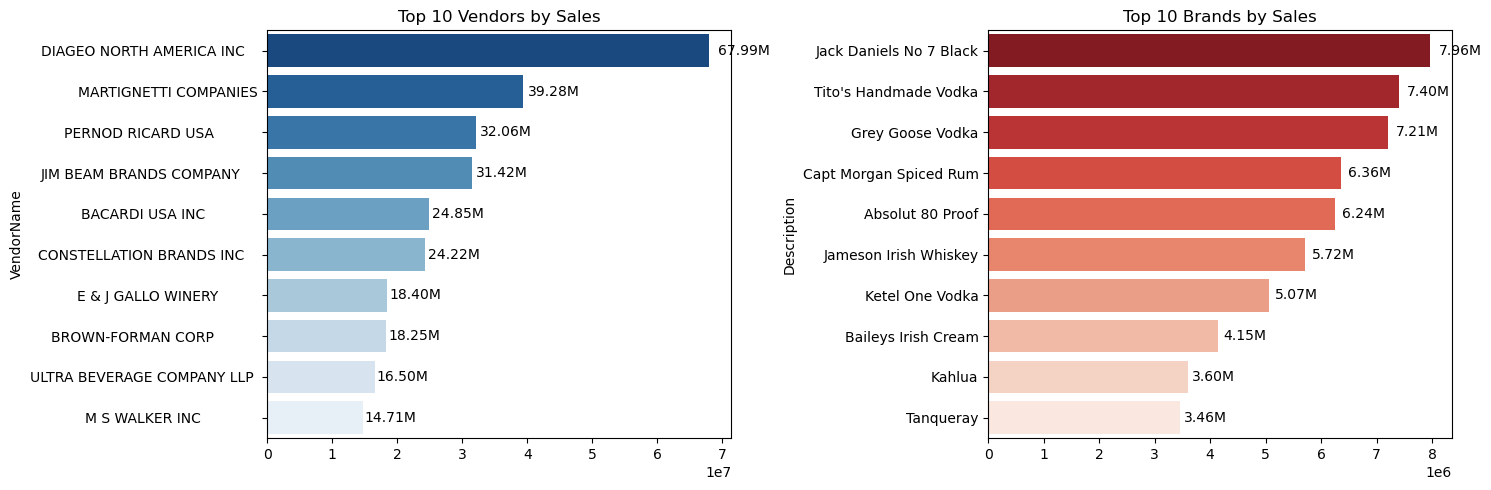

In [21]:
plt.figure(figsize=(15, 5))

#Plot for Top Vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette='Blues_r')
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + bar.get_width() * 0.02,
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )
            
#Plot for Top Brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index, x=top_brands.values, palette='Reds_r')
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + bar.get_width() * 0.02,
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )
            
plt.tight_layout()
plt.show()

#### Which vendors contribute the most to the total purchase dollars

In [22]:
vendor_performance = df.groupby('VendorName').agg({
    'Total_Purchased_Dollars':'sum',
    'Gross_Profit':'sum',
    'Total_SalesDollars':'sum'
}).reset_index()
vendor_performance
vendor_performance.shape

(120, 4)

In [23]:
vendor_performance['Purchase_Contribution%'] = vendor_performance['Total_Purchased_Dollars']/ vendor_performance['Total_Purchased_Dollars'].sum()*100

In [24]:
vendor_performance['Purchase_Contribution%'] = vendor_performance['Purchase_Contribution%'].round(2)

In [25]:
vendor_performance = vendor_performance.sort_values(by='Total_Purchased_Dollars', ascending=False)
vendor_performance

,VendorName,Total_Purchased_Dollars,Gross_Profit,Total_SalesDollars,Purchase_Contribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
57,MARTIGNETTI COMPANIES,25464774.04,13811624.76,39276398.80,8.29
69,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
108,UNCORKED,118.74,58.20,176.94,0.00
86,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [26]:
#Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['Total_SalesDollars'] = top_vendors['Total_SalesDollars'].apply(format_dollars)
top_vendors['Total_Purchased_Dollars'] = top_vendors['Total_Purchased_Dollars'].apply(format_dollars)
top_vendors['Gross_Profit'] = top_vendors['Gross_Profit'].apply(format_dollars)
top_vendors

,VendorName,Total_Purchased_Dollars,Gross_Profit,Total_SalesDollars,Purchase_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,8.29
69,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
107,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [27]:
top_vendors['Purchase_Contribution%'].sum()

65.68

In [28]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()
top_vendors

,VendorName,Total_Purchased_Dollars,Gross_Profit,Total_SalesDollars,Purchase_Contribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,8.29,24.59
69,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.35
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,39.99
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.66
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.63
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.94
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.87
107,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.50
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.68


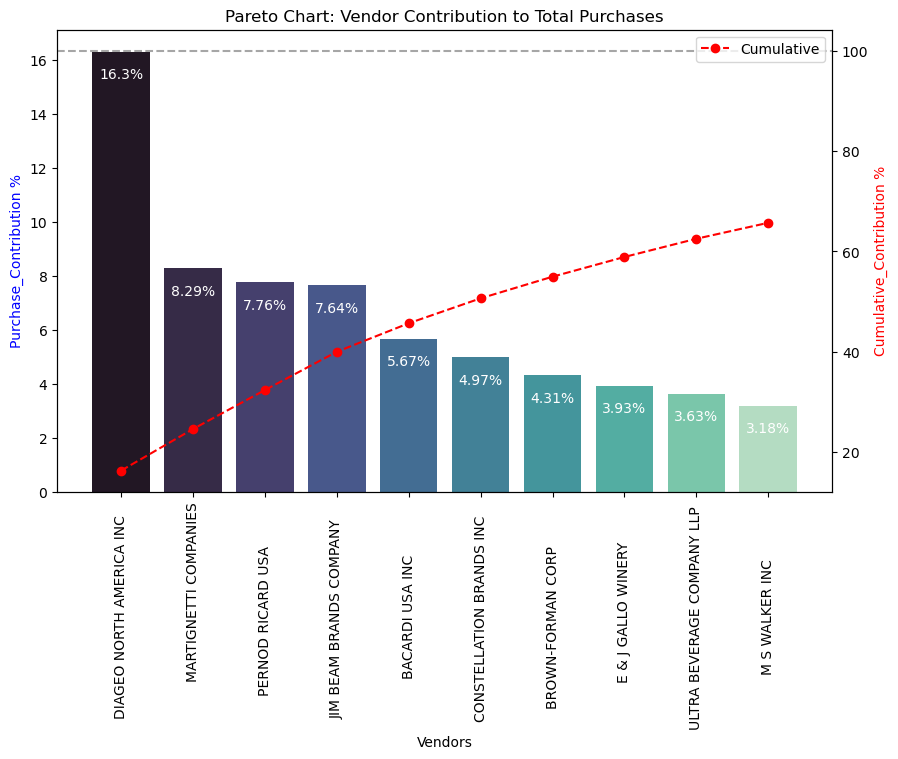

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase_Contribution %', color='blue')
ax2.set_ylabel('Cumulative_Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

#### How much of a total procurement is dependent on the top vendors?

In [30]:
print(f"Total Purchase Contribution of the top 10 Vendors is {round(top_vendors["Purchase_Contribution%"].sum(),2)} %")

Total Purchase Contribution of the top 10 Vendors is 65.68 %


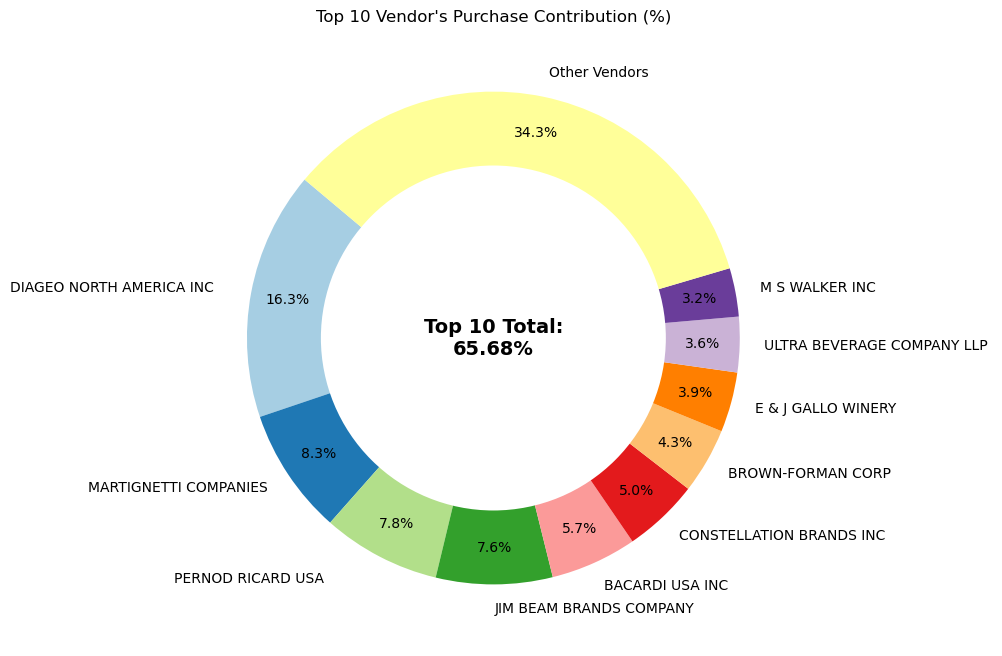

In [31]:
# --- Prepare Data for the Chart ---
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# --- Append "Other Vendors" Category ---
vendors.append('Other Vendors')
purchase_contributions.append(remaining_contribution)

# --- Create the Donut Chart ---
# Initialize the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Create the main pie chart
wedges, texts, autotexts = ax.pie(purchase_contributions, 
                                  labels=vendors, 
                                  autopct='%1.1f%%', 
                                  startangle=140, 
                                  pctdistance=0.85, 
                                  colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create the "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# --- Add Final Touches ---
# Add text annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", 
         fontsize=14, fontweight='bold', ha='center', va='center')

# Add the main title
plt.title("Top 10 Vendor's Purchase Contribution (%)")

# Display the chart
plt.show() # Note: plt.show() might be needed to display the plot

#### Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [32]:
df["Unit_Purchase_Price"] = df["Total_Purchased_Dollars"]/ df["Total_Purchased_Quantity"]
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,Volume,Total_Purchased_Quantity,Total_Purchased_Dollars,Total_SalesDollars,Total_SalesQuantity,Total_SalesPrice,Total_ExciseTax,Freight_Cost,Gross_Profit,Profit_Margin,Stock_Turnover,Sales_To_Purchase_Ratio,Unit_Purchase_Price
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,5101919.51,142049.0,672819.31,260999.20,68601.68,1290667.91,0.252977,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,4819073.49,160247.0,561512.37,294438.66,144929.24,1015032.27,0.210628,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,4538120.60,187140.0,461140.15,343854.07,123780.22,1119816.92,0.246758,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,4475972.88,200412.0,420050.01,368242.80,257032.07,1214774.94,0.271399,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,4223107.62,135838.0,545778.28,249587.83,257032.07,1199901.61,0.284128,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,15.95,5.0,10.96,0.55,27100.41,13.31,0.834483,2.500000,6.041667,1.32
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,65.66,134.0,1.47,7.04,50293.62,63.32,0.964362,22.333333,28.059829,0.39
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,1.98,2.0,0.99,0.10,14069.87,0.50,0.252525,1.000000,1.337838,0.74
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,143.28,72.0,77.61,15.12,257032.07,141.81,0.989740,72.000000,97.469388,1.47


In [33]:
df["Order_Size"] = pd.qcut(df["Total_Purchased_Quantity"], q=3, labels=["Small", "Medium", "Large"])
df[["Order_Size","Total_Purchased_Quantity"]]

,Order_Size,Total_Purchased_Quantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8559,Small,2
8560,Small,6
8561,Small,2
8562,Small,1


In [34]:
df.groupby('Order_Size')[["Unit_Purchase_Price"]].mean()

,Unit_Purchase_Price
Order_Size,
Small,39.068186
Medium,15.486414
Large,10.777625


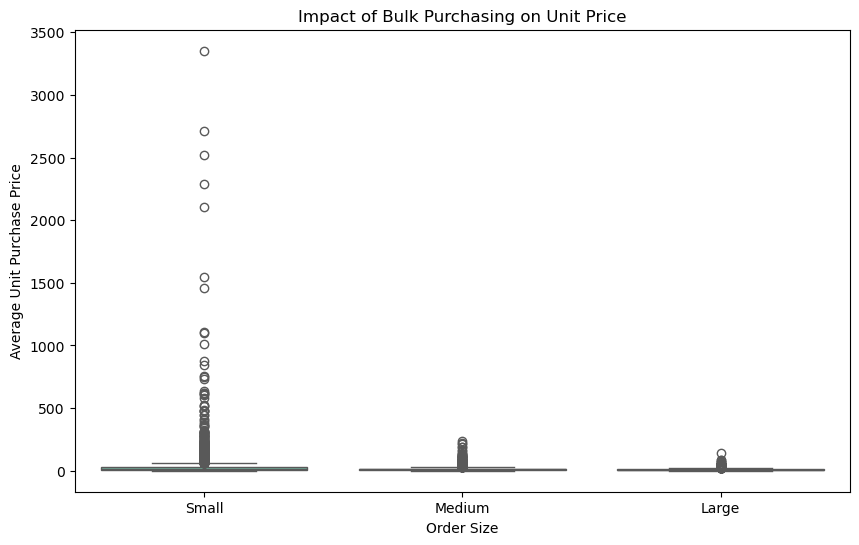

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Order_Size", y="Unit_Purchase_Price", palette='Set2')
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

### Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [36]:
df[df["Stock_Turnover"]<1]

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,Volume,Total_Purchased_Quantity,Total_Purchased_Dollars,Total_SalesDollars,Total_SalesQuantity,Total_SalesPrice,Total_ExciseTax,Freight_Cost,Gross_Profit,Profit_Margin,Stock_Turnover,Sales_To_Purchase_Ratio,Unit_Purchase_Price,Order_Size
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,5101919.51,142049.0,672819.31,260999.20,68601.68,1290667.91,0.252977,0.979108,1.338647,26.27,Large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,4819073.49,160247.0,561512.37,294438.66,144929.24,1015032.27,0.210628,0.976890,1.266830,23.19,Large
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,4538120.60,187140.0,461140.15,343854.07,123780.22,1119816.92,0.246758,0.998575,1.327594,18.24,Large
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,4475972.88,200412.0,420050.01,368242.80,257032.07,1214774.94,0.271399,0.993703,1.372493,16.17,Large
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,4223107.62,135838.0,545778.28,249587.83,257032.07,1199901.61,0.284128,0.983556,1.396897,21.89,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8191,653,STATE WINE & SPIRITS,24371,Tozai Typhoon Sake,10.45,15.99,720,6,62.70,79.95,5.0,79.95,0.55,8014.98,17.25,0.215760,0.833333,1.275120,10.45,Small
8201,9552,M S WALKER INC,398,S S Pierce Ninety Nine Gin,5.63,7.49,1000,11,61.93,67.41,9.0,7.49,9.45,55551.82,5.48,0.081294,0.818182,1.088487,5.63,Small
8202,1392,CONSTELLATION BRANDS INC,16916,R Mondavi Malbec Private Slt,5.15,7.99,750,12,61.80,85.90,10.0,34.96,1.12,79528.99,24.10,0.280559,0.833333,1.389968,5.15,Small
8242,8352,LUXCO INC,8629,Ezra Brooks Cinnamon Bourbon,11.02,13.99,1750,5,55.10,56.97,3.0,37.98,5.51,10261.60,1.87,0.032824,0.600000,1.033938,11.02,Small


In [37]:
df[df["Stock_Turnover"]<1].groupby("VendorName")[["Stock_Turnover"]].mean().sort_values('Stock_Turnover', ascending=True).head(10)

,Stock_Turnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [38]:
df["UnsoldInventoryValue"] = (df["Total_Purchased_Quantity"] - df["Total_SalesQuantity"]) * df["PurchasePrice"]
print("Total Unsold Capital", format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital 2.71M


In [39]:
#Aggregate Capital Locked Per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

#Sort Vendors with the highest locked capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending = False)
inventory_value_per_vendor["UnsoldInventoryValue"] = inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
69,PERNOD RICARD USA,470.63K
117,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
80,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
62,MOET HENNESSY USA INC,126.48K
78,REMY COINTREAU USA INC,118.60K


### What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.

In [40]:
top_threshold = df["Total_SalesDollars"].quantile(0.75)
low_threshold = df["Total_SalesDollars"].quantile(0.25)

In [41]:
top_vendors = df[df["Total_SalesDollars"] >= top_threshold]["Profit_Margin"].dropna()
low_vendors = df[df["Total_SalesDollars"] <= low_threshold]["Profit_Margin"].dropna()

In [42]:
top_vendors

0       0.252977
1       0.210628
2       0.246758
3       0.271399
4       0.284128
          ...   
3523    0.796848
3681    0.857821
4751    0.930859
4920    0.950125
5050    0.942719
Name: Profit_Margin, Length: 2141, dtype: float64

In [43]:
low_vendors

5631    0.041118
5652    0.061456
5701    0.120073
5704    0.016773
5724    0.072396
          ...   
8559    0.834483
8560    0.964362
8561    0.252525
8562    0.989740
8563    0.991661
Name: Profit_Margin, Length: 2141, dtype: float64

In [44]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (0.31, 0.32), Mean: 0.31
Low Vendors 95% CI: (0.41, 0.43), Mean: 0.42


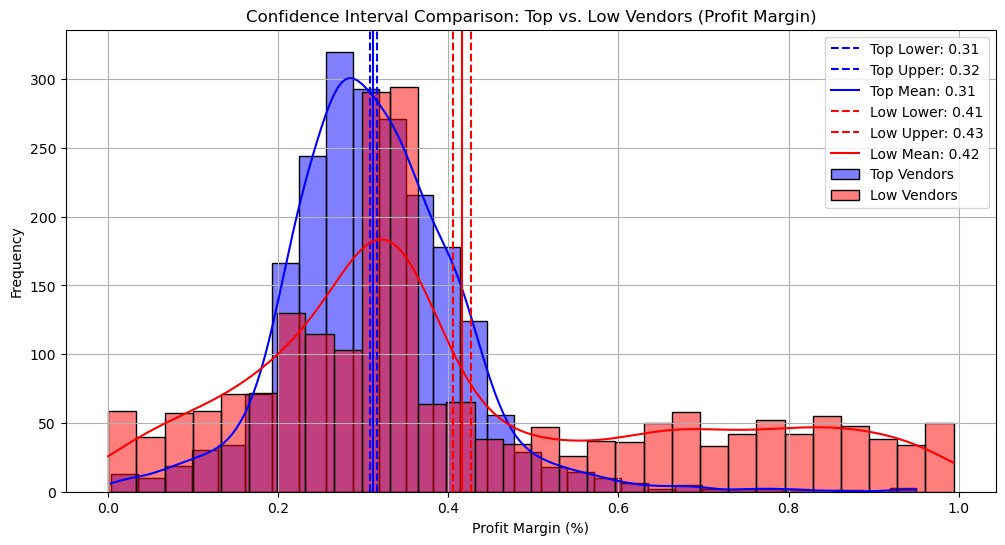

In [45]:
import numpy as np
import scipy.stats as stats

top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

* The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
* This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
* For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
* For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

### Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

H₀ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H₁ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.